In [5]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("white")

In [2]:
# Concat dataframes for different archetypes
# Change column names
# Remove unnecessary columns

In [2]:
df_southern = pd.read_csv("endpoints_f70751f3-2d98-eb11-a2ce-c4346bcb1550.csv")
df_sahel = pd.read_csv("endpoints_bfc6b202-2c98-eb11-a2ce-c4346bcb1550.csv")

df_southern["archetype"] = "Southern"
df_sahel["archetype"] = "Sahel"

df = pd.concat([df_southern, df_sahel], ignore_index=True)

In [34]:
df["received_drugs_in_intervention"] = df["Received_Campaign_Drugs"] + df["Received_RCD_Drugs"]

In [35]:
marita_col_renames = {"Received_Treatment": "received_drugs_in_health_facility",
                      "Received_Test": "received_rdt_in_intervention",
                      "Received_SMC": "received_smc_drugs"
                     }

In [36]:
df.rename(columns=marita_col_renames,inplace=True)

In [37]:
df.columns

Index(['pfpr0_5', 'pfpr2_10', 'pfpr6_15', 'pfpr16_500', 'pfpr_all',
       'clinical_incidence0_5', 'clinical_incidence2_10',
       'clinical_incidence6_15', 'clinical_incidence16_500',
       'clinical_incidence_all', 'severe_incidence0_5', 'severe_incidence2_10',
       'severe_incidence6_15', 'severe_incidence16_500',
       'severe_incidence_all', 'pop0_5', 'pop2_10', 'pop6_15', 'pop16_500',
       'pop_all', 'avg_age', 'avg_age_clinical_cases', 'avg_age_severe_cases',
       'sim_id', 'archetype', 'burnin_approx_pfpr2_10', 'burnin_habitat_scale',
       'drug_type', 'exe_collection_id', 'hs_rate', 'input_collection_id',
       'interval', 'itn_coverage', 'out_of_school_rate', 'Run_Number',
       'scenario_number', 'screen_type', 'smc_on', 'target_age_range',
       'within_school_coverage', 'received_drugs_in_health_facility',
       'received_rdt_in_intervention', 'Received_Campaign_Drugs',
       'Received_RCD_Drugs', 'received_smc_drugs', 'Received_Ivermectin',
       'Receiv

In [38]:
drop_columns = ["sim_id", "burnin_habitat_scale", "exe_collection_id", 
                "input_collection_id", "Received_Campaign_Drugs", "Received_RCD_Drugs", "Received_Ivermectin",
               "Received_Primaquine"]

df_clean = df.drop(columns=drop_columns)

In [40]:
df_clean.columns

Index(['pfpr0_5', 'pfpr2_10', 'pfpr6_15', 'pfpr16_500', 'pfpr_all',
       'clinical_incidence0_5', 'clinical_incidence2_10',
       'clinical_incidence6_15', 'clinical_incidence16_500',
       'clinical_incidence_all', 'severe_incidence0_5', 'severe_incidence2_10',
       'severe_incidence6_15', 'severe_incidence16_500',
       'severe_incidence_all', 'pop0_5', 'pop2_10', 'pop6_15', 'pop16_500',
       'pop_all', 'avg_age', 'avg_age_clinical_cases', 'avg_age_severe_cases',
       'archetype', 'burnin_approx_pfpr2_10', 'drug_type', 'hs_rate',
       'interval', 'itn_coverage', 'out_of_school_rate', 'Run_Number',
       'scenario_number', 'screen_type', 'smc_on', 'target_age_range',
       'within_school_coverage', 'received_drugs_in_health_facility',
       'received_rdt_in_intervention', 'received_smc_drugs',
       'received_drugs_in_intervention'],
      dtype='object')

In [41]:
df_clean.to_csv("sim_data_cleaned_20210408.csv", index=False)

Text(0.5, 1.0, 'Average age in last year of simulation')

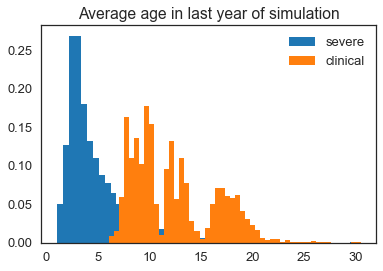

In [21]:
plt.hist(df["avg_age_severe_cases"],bins=50, density=True, label="severe")
plt.hist(df["avg_age_clinical_cases"],bins=50, density=True,label="clinical")
# plt.hist(df["avg_age"], bins=50, density=True)
plt.legend()
plt.title("Average age in last year of simulation")

In [25]:
df[df["avg_age_severe_cases"]>15]["burnin_approx_pfpr2_10"]

134     0.05
262     0.05
329     0.05
607     0.05
717     0.05
995     0.05
1119    0.05
1223    0.05
1234    0.05
1281    0.05
1318    0.05
1334    0.05
1479    0.05
1495    0.05
1503    0.05
1519    0.05
1654    0.05
1709    0.05
1721    0.05
1737    0.05
1786    0.05
1821    0.15
1822    0.05
1891    0.05
1904    0.05
1907    0.05
1926    0.05
1937    0.05
1978    0.05
2000    0.05
2117    0.05
2135    0.05
2220    0.05
2264    0.15
2349    0.05
2461    0.05
2514    0.05
2669    0.15
2698    0.05
2730    0.05
Name: burnin_approx_pfpr2_10, dtype: float64

c:\users\jsuresh\venv\default_venv\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\jsuresh\venv\default_venv\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Average age in last year of simulation')

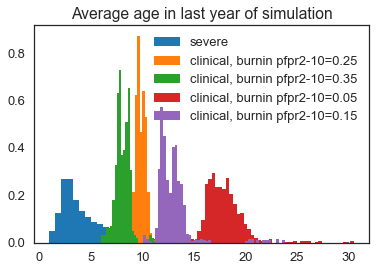

In [26]:
plt.hist(df["avg_age_severe_cases"],bins=50, density=True, label="severe")

for b in set(list(df["burnin_approx_pfpr2_10"])):
    plt.hist(df["avg_age_clinical_cases"][df["burnin_approx_pfpr2_10"]==b],bins=50, density=True,label="clinical, burnin pfpr2-10={}".format(b))
# plt.hist(df["avg_age"], bins=50, density=True)
plt.legend()
plt.title("Average age in last year of simulation")

In [3]:
from pandas_profiling import ProfileReport

In [8]:
ProfileReport(df, minimal=True)

Summarize dataset:   0%|          | 0/55 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]